import the required libraries such as keras and scikit learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss, mean_squared_error, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD

syntax for mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read datasets in csv format and stored in variables. in the program this time I use google drive to import it. and read the first 5 rows of the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


view of infomation and describe like mean or std from dataset. And view count, unique from type data object.

In [ ]:
df.info()
df.describe()
df.select_dtypes('object').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


displays data null and data duplicate from dataset. And if there is data duplicate or null data must be drop or fill those data with mean or modus.

In [ ]:
print("=========== Sum null of dataset================== ")
print(df.isnull().sum())
print("=========== Sum Duplicate of dataset================== ")
df[df.duplicated()]

=========== Sum null of dataset================== 
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
=========== Sum Duplicate of dataset================== 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


This is syntax for drop null data and reset index. If you not reset index, index in your data not order like from 2 and go to 4.

In [ ]:
df = df.dropna().reset_index(drop=True)

Check again if data is null and duplicate or not.

In [ ]:
print("=========== Sum null of dataset================== ")
print(df.isnull().sum())
print("=========== Sum Duplicate of dataset================== ")
df[df.duplicated()]

=========== Sum null of dataset================== 
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
=========== Sum Duplicate of dataset================== 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


view the unique amount of data from each data object

In [ ]:
categoric_col = df.select_dtypes('object').columns
for i in categoric_col:
    print(df[i].value_counts())
    print()

Because dataset have type data object so the data must be convert to type data int or float. And this syntax use labelencoder for convert type data object to type data int like 0, 1, 2, 3. And in the last line drop the table id because id didnt use for modelling.

In [ ]:
labelencoder_y = LabelEncoder()
df['gender'] = labelencoder_y.fit_transform(df['gender'])
df['ever_married'] = labelencoder_y.fit_transform(df['ever_married'])
df['work_type'] = labelencoder_y.fit_transform(df['work_type'])
df['Residence_type'] = labelencoder_y.fit_transform(df['Residence_type'])
df['smoking_status'] = labelencoder_y.fit_transform(df['smoking_status'])
df.drop(columns=['id'],inplace=True)

check the dataset whether there is a data object or not

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 422.0 KB


Display heatmap from dataset and view correlation variabel stroke and other variables.

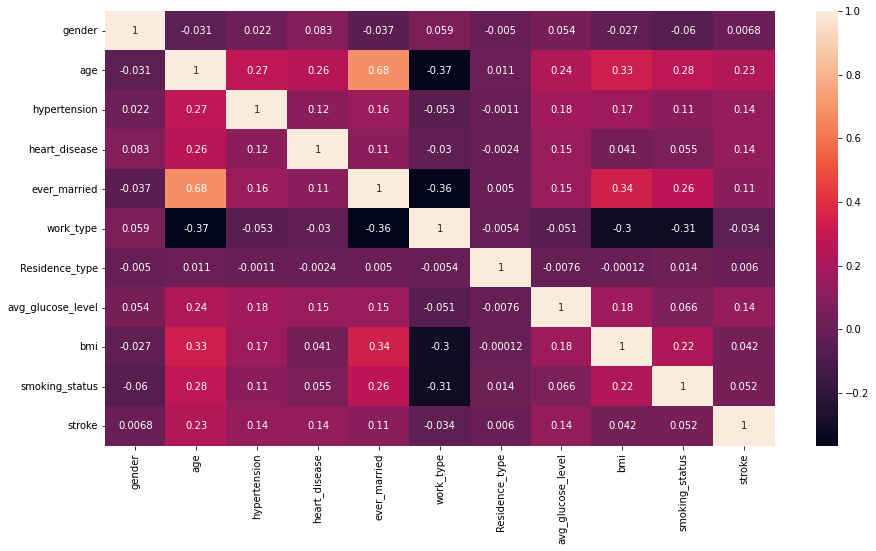

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Display boxplot from each variabel in dataset and view whether there are outliers in the data or not

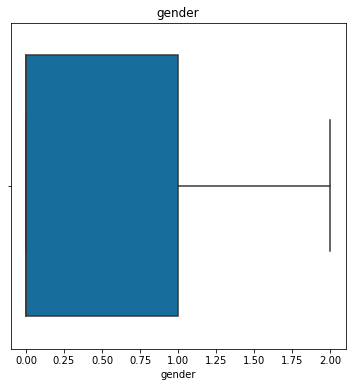

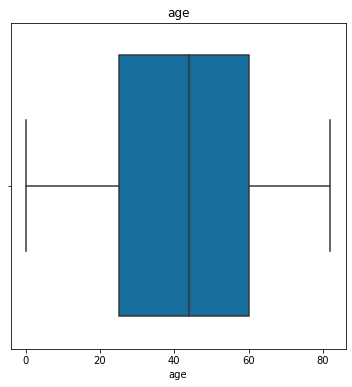

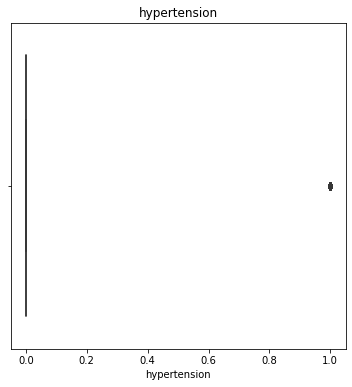

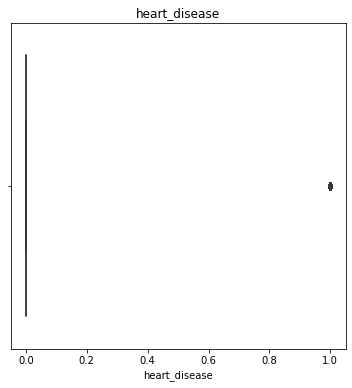

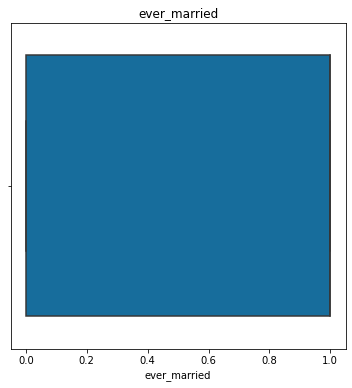

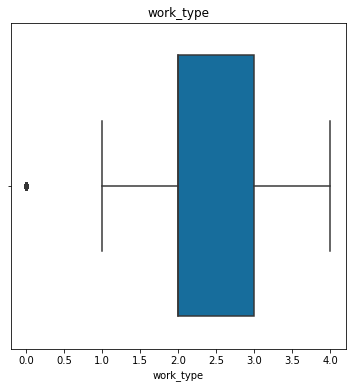

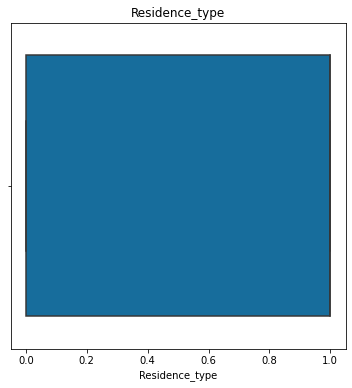

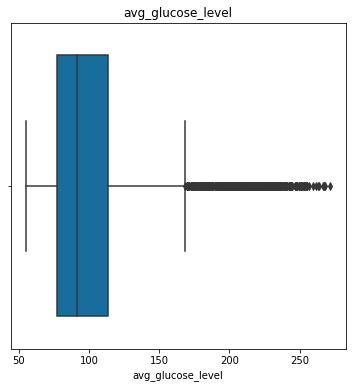

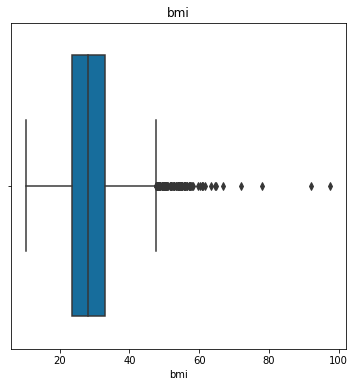

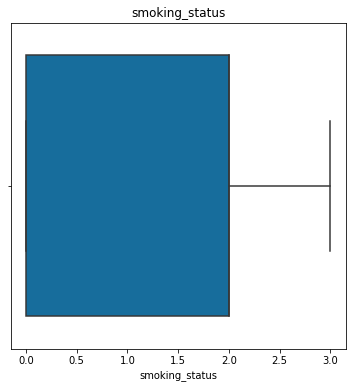

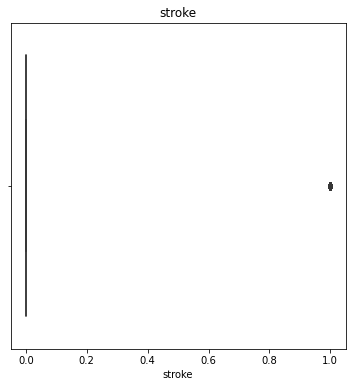

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='gender',data=df, 
                 palette="colorblind")
plt.title('gender');

plt.figure(figsize=(6,6))
sns.boxplot(x='age',data=df, 
                 palette="colorblind")
plt.title('age');

plt.figure(figsize=(6,6))
sns.boxplot(x='hypertension',data=df, 
                 palette="colorblind")
plt.title('hypertension');

plt.figure(figsize=(6,6))
sns.boxplot(x='heart_disease',data=df, 
                 palette="colorblind")
plt.title('heart_disease');

plt.figure(figsize=(6,6))
sns.boxplot(x='ever_married',data=df, 
                 palette="colorblind")
plt.title('ever_married');

plt.figure(figsize=(6,6))
sns.boxplot(x='work_type',data=df, 
                 palette="colorblind")
plt.title('work_type');

plt.figure(figsize=(6,6))
sns.boxplot(x='Residence_type',data=df, 
                 palette="colorblind")
plt.title('Residence_type');

plt.figure(figsize=(6,6))
sns.boxplot(x='avg_glucose_level',data=df, 
                 palette="colorblind")
plt.title('avg_glucose_level');

plt.figure(figsize=(6,6))
sns.boxplot(x='bmi',data=df, 
                 palette="colorblind")
plt.title('bmi');

plt.figure(figsize=(6,6))
sns.boxplot(x='smoking_status',data=df, 
                 palette="colorblind")
plt.title('smoking_status');

plt.figure(figsize=(6,6))
sns.boxplot(x='stroke',data=df, 
                 palette="colorblind")
plt.title('stroke');

remove outlier using quantile 3 - quantile 1

In [ ]:
num_var = ['avg_glucose_level','bmi']
for i in num_var:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i] = np.where(df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df[i])
    df[i] = np.where(df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df[i])

check again outlier using boxplot

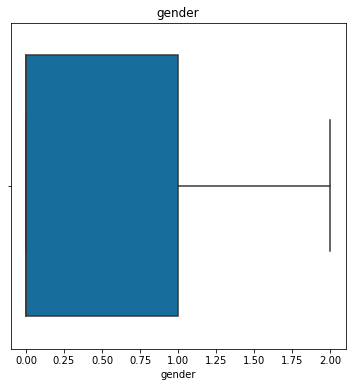

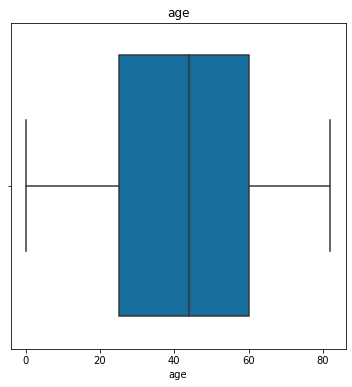

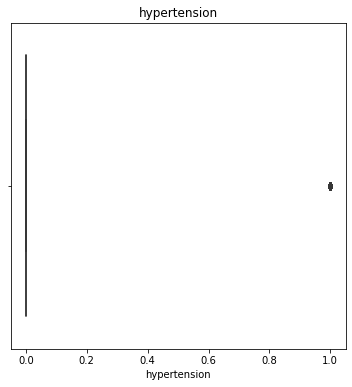

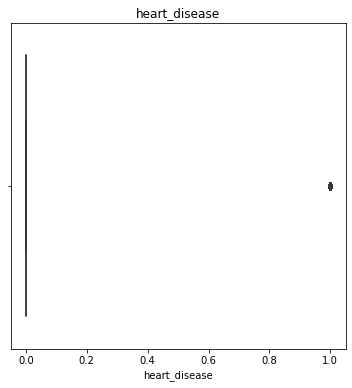

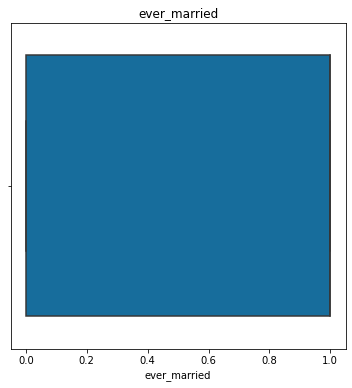

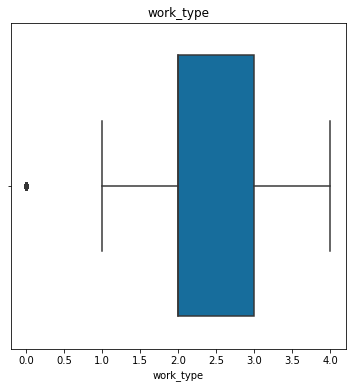

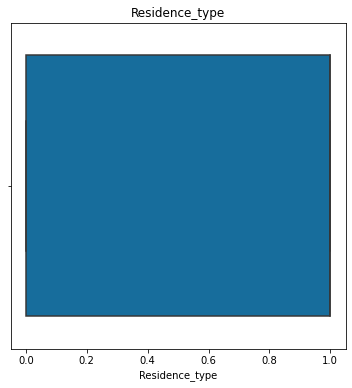

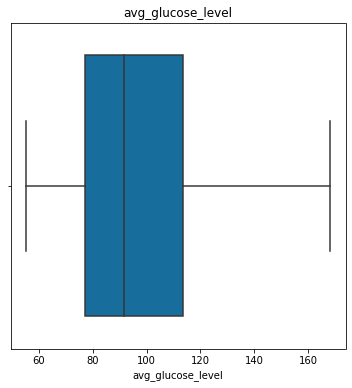

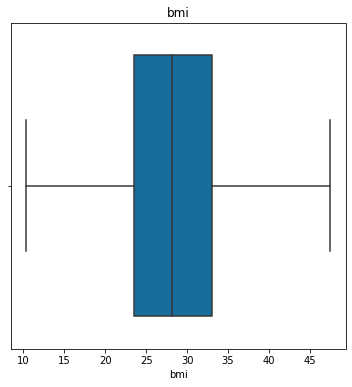

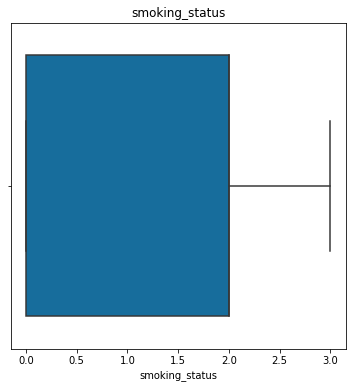

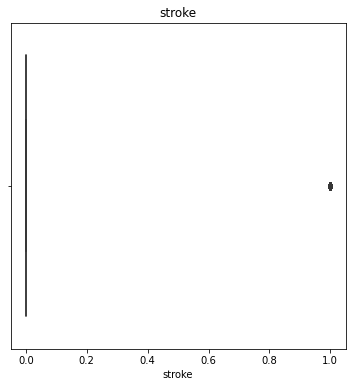

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='gender',data=df, 
                 palette="colorblind")
plt.title('gender');

plt.figure(figsize=(6,6))
sns.boxplot(x='age',data=df, 
                 palette="colorblind")
plt.title('age');

plt.figure(figsize=(6,6))
sns.boxplot(x='hypertension',data=df, 
                 palette="colorblind")
plt.title('hypertension');

plt.figure(figsize=(6,6))
sns.boxplot(x='heart_disease',data=df, 
                 palette="colorblind")
plt.title('heart_disease');

plt.figure(figsize=(6,6))
sns.boxplot(x='ever_married',data=df, 
                 palette="colorblind")
plt.title('ever_married');

plt.figure(figsize=(6,6))
sns.boxplot(x='work_type',data=df, 
                 palette="colorblind")
plt.title('work_type');

plt.figure(figsize=(6,6))
sns.boxplot(x='Residence_type',data=df, 
                 palette="colorblind")
plt.title('Residence_type');

plt.figure(figsize=(6,6))
sns.boxplot(x='avg_glucose_level',data=df, 
                 palette="colorblind")
plt.title('avg_glucose_level');

plt.figure(figsize=(6,6))
sns.boxplot(x='bmi',data=df, 
                 palette="colorblind")
plt.title('bmi');

plt.figure(figsize=(6,6))
sns.boxplot(x='smoking_status',data=df, 
                 palette="colorblind")
plt.title('smoking_status');

plt.figure(figsize=(6,6))
sns.boxplot(x='stroke',data=df, 
                 palette="colorblind")
plt.title('stroke');

view sum of each class on data stroke. the goal is to see if there is an inbalancing data

In [ ]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Because in there is data stroke inbalancing data so in this program will use undersampling to solve problem inbalancing data.

In [ ]:
# Class count
count_class_0, count_class_1 = df.stroke.value_counts()

# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.stroke.value_counts())

Random under-sampling:
0    209
1    209
Name: stroke, dtype: int64


Divide dataset to X dan Y. X for data feature and Y for data target. And the reset index each variabel

In [ ]:
X = df_under.drop('stroke', axis=1).reset_index(drop=True)
y = df_under['stroke'].reset_index(drop=True)

There are several variables whose values ​​range between them quite far. Therefore, scaling data is used to solve the problem. This program uses a standard scaler for the scaling method.

In [ ]:
tf = StandardScaler().fit_transform(X)
scaledf = pd.DataFrame(tf, columns=X.columns)
scaledf['stroke'] = y
scaledf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-0.869657,-1.115751,-0.482740,-0.368605,-1.831438,-0.098920,-1.024217,-0.424292,-0.831242,-0.476942,0
1,-0.869657,1.093651,-0.482740,-0.368605,0.546019,0.909586,0.976356,-0.836835,0.369170,-1.488930,0
2,-0.869657,0.282034,-0.482740,-0.368605,-1.831438,-0.098920,-1.024217,-1.059810,1.134433,0.535046,0
3,1.149879,-2.197908,-0.482740,-0.368605,-1.831438,1.918092,0.976356,-0.587082,-1.776567,-1.488930,0
4,-0.869657,-1.566650,-0.482740,-0.368605,-1.831438,-0.098920,0.976356,-0.899936,-0.186021,0.535046,0
...,...,...,...,...,...,...,...,...,...,...,...
413,-0.869657,0.597663,2.071507,2.712932,0.546019,-0.098920,0.976356,1.549340,1.644608,-0.476942,1
414,1.149879,0.101674,-0.482740,-0.368605,0.546019,-0.098920,-1.024217,-0.660788,1.074412,-1.488930,1
415,-0.869657,-1.837189,-0.482740,-0.368605,-1.831438,1.918092,-1.024217,-1.377436,0.204113,-1.488930,1
416,-0.869657,0.913292,-0.482740,-0.368605,0.546019,0.909586,-1.024217,-0.824109,-0.035969,-0.476942,1


View information of scaledf and view describe scaledf

In [ ]:
scaledf.info()
scaledf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             418 non-null    float64
 1   age                418 non-null    float64
 2   hypertension       418 non-null    float64
 3   heart_disease      418 non-null    float64
 4   ever_married       418 non-null    float64
 5   work_type          418 non-null    float64
 6   Residence_type     418 non-null    float64
 7   avg_glucose_level  418 non-null    float64
 8   bmi                418 non-null    float64
 9   smoking_status     418 non-null    float64
 10  stroke             418 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 36.0 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,418.000000
mean,-6.586969e-17,1.699863e-16,5.099589e-17,1.699863e-17,-5.099589e-17,-1.869849e-16,4.674623e-17,2.889767e-16,2.549795e-16,-1.699863e-17,0.500000
std,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,0.500599
min,-8.696566e-01,-2.457625e+00,-4.827405e-01,-3.686049e-01,-1.831438e+00,-2.115933e+00,-1.024217e+00,-1.449287e+00,-2.196711e+00,-1.488930e+00,0.000000
25%,-8.696566e-01,-6.084907e-01,-4.827405e-01,-3.686049e-01,5.460189e-01,-9.892047e-02,-1.024217e+00,-8.195354e-01,-6.361754e-01,-4.769417e-01,0.000000
50%,-8.696566e-01,1.918540e-01,-4.827405e-01,-3.686049e-01,5.460189e-01,-9.892047e-02,9.763560e-01,-3.204934e-01,-1.710157e-01,5.350462e-01,0.500000
75%,1.149879e+00,8.682017e-01,-4.827405e-01,-3.686049e-01,5.460189e-01,9.095858e-01,9.763560e-01,1.086356e+00,4.592008e-01,5.350462e-01,1.000000
max,1.149879e+00,1.228920e+00,2.071507e+00,2.712932e+00,5.460189e-01,1.918092e+00,9.763560e-01,1.549340e+00,2.694969e+00,1.547034e+00,1.000000


Spliting data train and data test. Size of data train is 80% and size of data test is 20%

In [ ]:
xx = scaledf.drop('stroke', axis=1)
yy = scaledf['stroke']
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(334, 10) (334,) (84, 10) (84,)


Create variable validation for evaluasi model.

In [ ]:
x_val = X_train[-84:]
y_val = y_train[-84:]

Create model using 3 layer. Layer 1 is input layer using 10 node and activation relu. Relu is used because this function will make negative values ​​become 0 and values ​​that are more than 0 will remain in value. And then layer 2 is hidden layer using 2 node and activation relu. And last layer is output layer using 1 node and activation sigmoid. Sigmoid is used because function sigmoid output between 0 and 1.

In [ ]:
model = keras.Sequential()
model.add(Dense(units = 10, activation='relu', input_dim= 10)) #input layer
model.add(Dense(units = 2, activation='relu')) #hidden layer
model.add(Dense(units = 1, activation='sigmoid')) # output layer

This is summary of model created

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 2)                 22        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


Compiling model used optimizer Adam with learning rate 0.0001 and loss BinaryCrossentropy metrics is accuracy.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])

And model fitting use batch size 16 and epochs 10000

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10000,
    validation_data=(x_val, y_val),
)


Streaming output truncated to the last 5000 lines.
21/21 [==============================] - 0s 6ms/step - loss: 0.2017 - accuracy: 0.9222 - val_loss: 0.2664 - val_accuracy: 0.8810
Epoch 7502/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.2017 - accuracy: 0.9251 - val_loss: 0.2665 - val_accuracy: 0.8810
Epoch 7503/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.9222 - val_loss: 0.2668 - val_accuracy: 0.8810
Epoch 7504/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.2017 - accuracy: 0.9222 - val_loss: 0.2669 - val_accuracy: 0.8810
Epoch 7505/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.9222 - val_loss: 0.2662 - val_accuracy: 0.8810
Epoch 7506/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.2017 - accuracy: 0.9222 - val_loss: 0.2665 - val_accuracy: 0.8810
Epoch 7507/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.2016 - acc

Plotting loss and accuracy model with line plot

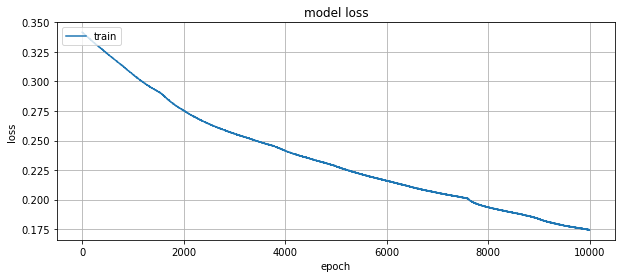

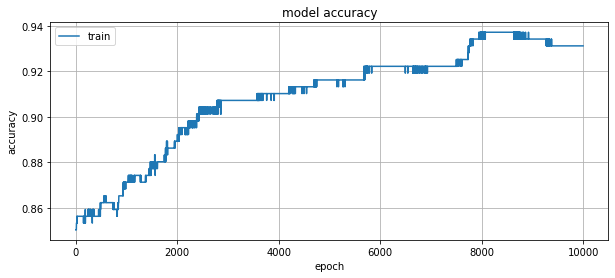

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

Create program for view the output prediction

In [ ]:
kelas = np.round(model.predict(X_test),0)
hasil_prediksi = np.asarray(kelas, dtype = 'int')
print(hasil_prediksi)
ypred = hasil_prediksi

3/3 [==============================] - 0s 3ms/step
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


Then look at the Confusion matrix of the results of the model which are stored in the ypred variable and compared with the y_test variable. It can be seen that the f1 score obtained from this model is 76%.

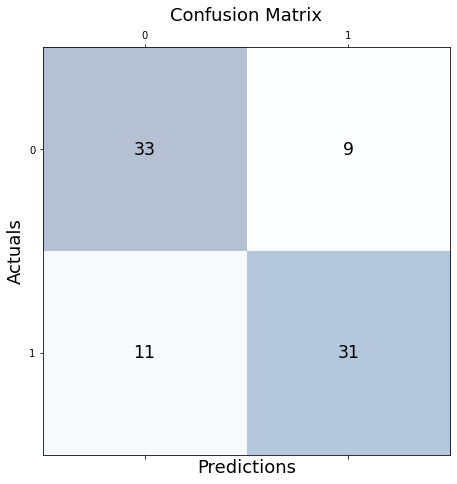

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        44
           1       0.74      0.78      0.76        40

    accuracy                           0.76        84
   macro avg       0.76      0.76      0.76        84
weighted avg       0.76      0.76      0.76        84



In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=ypred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
report = classification_report(ypred, y_test)
print(report)

After that, we try to plot the test data or y-test using the dot plot with the aim that later it will be compared with the plotted data of the predicted results.

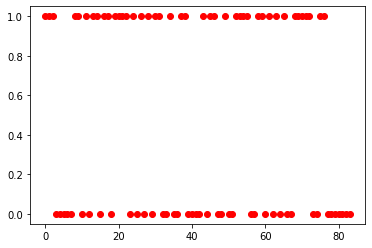

In [ ]:
y_test_array = np.array(y_test)
plt.plot(y_test_array, 'ro')
plt.show()

plotting the prediction results

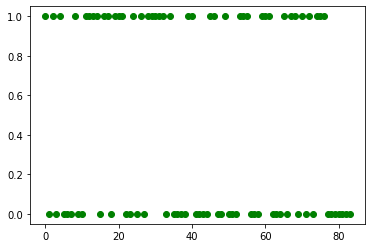

In [ ]:
plt.plot(ypred, 'go')
plt.show()

It can be seen the comparison of plotting on the test data and training data. Only a few data differ between test data and training data.

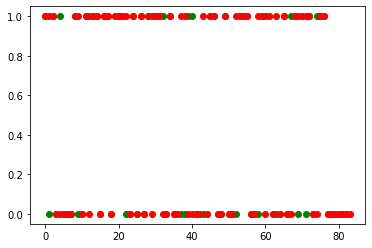

In [ ]:
plt.plot(ypred, 'go')
plt.plot(y_test_array, 'ro')
plt.show()

CONCLUTION

The conclusion is that this dataset still has problems with inbalancing data. Further development can use other data inbalancing methods to increase the accuracy of the model. Then the model layer still uses ANN so there is still the possibility to improve the accuracy of the model.